In [2]:
# import gc
# gc.collect()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [126]:
worldDf = pd.read_csv('data/world_cities.csv')
worldDf

,Unnamed: 0,City / Urban area,Country,Population,Land area (in sqKm)
0,0,Buenos Aires,Argentina,11200000,2266
1,1,Melbourne,Australia,3162000,2080
2,2,Sydney,Australia,3502000,1687
3,3,Brisbane,Australia,1508000,1603
4,4,Perth,Australia,1177000,964
...,...,...,...,...,...
244,245,Canton,USA,267000,372
245,246,Spokane,USA,335000,371
246,247,Tashkent,Uzbekistan,2200000,531
247,248,Ho Chi Minh City,Vietnam,4900000,518


In [4]:
worldDf['City / Urban area'].describe()

count              249
unique             249
top       Buenos Aires
freq                 1
Name: City / Urban area, dtype: object

In [5]:
worldDf['Country'].describe()

count     249
unique     61
top       USA
freq      105
Name: Country, dtype: object

In [6]:
filter=np.where(worldDf['Population'] / worldDf['Land area (in sqKm)'] > 10000)
worldDf.loc[filter].shape
# worldDf.info()

(19, 5)

In [7]:
worldDf['Density'] = worldDf['Population'] / worldDf['Land area (in sqKm)']
worldDf.sort_values(by='Density',ascending=False)

,Unnamed: 0,City / Urban area,Country,Population,Land area (in sqKm),Density
75,75,Mumbai,India,14350000,484,29648.760331
74,74,Kolkata,India,12700000,531,23917.137476
101,101,Karachi,Pakistan,9800000,518,18918.918919
99,99,Lagos,Nigeria,13400000,738,18157.181572
34,34,Shenzhen,China,8000000,466,17167.381974
...,...,...,...,...,...,...
194,195,Chattanooga,USA,344000,751,458.055925
223,224,Asheville,USA,222000,536,414.179104
57,57,Pau,France,181000,450,402.222222
220,221,Hickory,USA,188000,546,344.322344


In [129]:
worldDf

,Unnamed: 0,City / Urban area,Country,Population,Land area (in sqKm)
0,0,Buenos Aires,Argentina,11200000,2266
1,1,Melbourne,Australia,3162000,2080
2,2,Sydney,Australia,3502000,1687
3,3,Brisbane,Australia,1508000,1603
4,4,Perth,Australia,1177000,964
...,...,...,...,...,...
244,245,Canton,USA,267000,372
245,246,Spokane,USA,335000,371
246,247,Tashkent,Uzbekistan,2200000,531
247,248,Ho Chi Minh City,Vietnam,4900000,518


In [8]:
fourCoun=worldDf['Country'].value_counts()
fourCoun[fourCoun==4]

Italy    4
Name: Country, dtype: int64

---

In [9]:
sugang=pd.read_csv('data/enrolment_1.csv',index_col=0)
sugang['status'] = 'allowed'
sugang
# sugang['id'].value_counts().shape

,year,course name,status
id,,,
2777729,1,science,allowed
2777730,2,science,allowed
2777765,1,arts,allowed
2777766,2,arts,allowed
2777785,1,mba,allowed
...,...,...,...
2796805,3,computer application,allowed
2796812,1,nursing,allowed
2796813,2,nursing,allowed


In [10]:
sugang.index

Int64Index([2777729, 2777730, 2777765, 2777766, 2777785, 2777786, 2777793,
            2777794, 2777795, 2777796,
            ...
            2796800, 2796801, 2796802, 2796803, 2796804, 2796805, 2796812,
            2796813, 2796814, 2796815],
           dtype='int64', name='id', length=2000)

In [11]:
cond1 = (sugang['course name'] == 'information technology') & (sugang['year'] == 1)
sugang.loc[cond1,'status'] = 'not allowed'

In [12]:
cond2 = (sugang['course name'] == 'commerce') & (sugang['year'] == 4)
sugang.loc[cond2,'status'] = 'not allowed'

In [13]:
allowed=sugang['status'] == 'allowed'
courseCounts = sugang.loc[allowed,'course name'].value_counts()
courseCounts

arts                     158
science                  124
commerce                 101
english                   56
education                 41
                        ... 
environmental science      1
jmc                        1
biological sciences        1
aqua culture               1
dcl                        1
Name: course name, Length: 296, dtype: int64

In [14]:
closed = list(courseCounts[courseCounts<5].index)
closed #폐강과목리스트

['applied sc.',
 'electrical engg',
 'chemical',
 'electrical and electronics engineering',
 'electronics and communication',
 'instrumentation engineering',
 'computer engg with specialization in cloud computing.',
 'electronics & communication engineering',
 'civil engg',
 'mechanical engg.',
 'physical education',
 'engg. & tech.',
 'bpt',
 'electros & communicationnic',
 'mechanical related subjects',
 'mech',
 'information subjects',
 'data structure',
 'pathology',
 'database',
 'agriculture',
 'korean',
 'fashion communication',
 'electronics and instrumentation',
 'refactoring',
 'leather design',
 'computer architecture',
 'environment',
 'tool & die making',
 'ai & as',
 'master of computer application',
 'buisiness administration',
 'digital electronics',
 'compulsory',
 'electronics & comm engg',
 'b.com.',
 'i.t',
 'jain darshan',
 'bbi',
 'co-operation',
 'c bc bt',
 'vocational',
 'corporate secaratoryship',
 'comp science',
 'b.com (p)',
 'm.i.l',
 'b.com.(gen.e/m)',
 '

In [21]:
for course in closed:
    sugang.loc[sugang['course name'] == course, 'status'] = 'not allowed'

In [26]:
# print(sugang['status'] == 'not allowed')

id
2777729    False
2777730    False
2777765    False
2777766    False
2777785    False
           ...  
2796805    False
2796812    False
2796813    False
2796814    False
2796815    False
Name: status, Length: 2000, dtype: bool


In [27]:
sugang

,year,course name,status
id,,,
2777729,1,science,allowed
2777730,2,science,allowed
2777765,1,arts,allowed
2777766,2,arts,allowed
2777785,1,mba,allowed
...,...,...,...
2796805,3,computer application,allowed
2796812,1,nursing,allowed
2796813,2,nursing,allowed


In [1]:
%matplotlib inline

import pandas as pd

In [75]:
df=pd.read_csv('data/gdp.csv',index_col=0)
# pd.set_option("max_columns", None) #생략없애기
pd.set_option("max_rows", None)
df

,Aruba,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Cyprus,Czech Republic,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,"Micronesia, Fed. Sts.",Gabon,United_Kingdom,Georgia,Ghana,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Guatemala,Guyana,High income,"Hong Kong SAR, China",Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,India,Ireland,"Iran, Islamic Rep.",Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,Korea_Rep,Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,"Macao SAR, China",Morocco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,"Macedonia, FYR",Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Portugal,Paraguay,West Bank and Gaza,Pacific island small states,Post-demographic dividend,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Serbia,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa,Small states,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Seychelles,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United_States,Uzbekistan,St. Vincent and the Grenadines,Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,1.873453e+09,9.129595e+09,3.480355e+09,1.434430e+09,7.351881e+11,1.043374e+11,2.842038e+11,1.911564e+09,8.301588e+08,4.150342e+11,1.967998e+11,5.272617e+09,8.704861e+08,2.379049e+11,2.569187e+09,2.628920e+09,5.336979e+10,1.315302e+10,9.062907e+09,8.076470e+09,5.505984e+09,1.273686e+10,8.320724e+08,8.397913e+09,6.554206e+11,3.121500e+09,6.001153e+09,4.391582e+08,5.788330e+09,9.145003e+08,7.422934e+11,4.278314e+11,2.720555e+11,7.786093e+10,1.211347e+12,1.071702e+10,1.008394e+10,1.908805e+10,3.219911e+09,9.988658e+10,3.502643e+08,5.392273e+08,1.494951e+10,3.417706e+10,3.056540e+10,9.985844e+09,6.164949e+10,1.949954e+12,5.512309e+08,3.334689e+08,1.641588e+11,2.430512e+10,5.479025e+10,1.735179e+12,3.289052e+12,8.280879e+12,6.981286e+11,1.001878e+13,1.832776e+10,9.983854e+10,6.480939e+12,5.954026e+11,5.685775e+09,8.242392e+09,8.906062e+12,2.175566e+11,1.255399e+11,1.684110e+09,1.362249e+12,233226300.0,5.067865e+09,1.647951e+12,3.

In [73]:
#열찾는방법
# sorted(df.columns)
col=pd.Series(df.columns)
col[col.str.contains('Chi')]

['Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea

<AxesSubplot:>

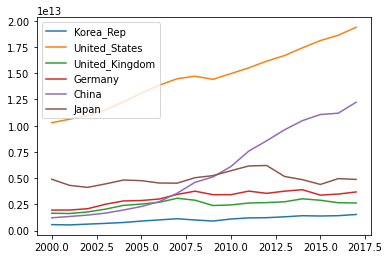

In [32]:
df.plot(y=['Korea_Rep','United_States','United_Kingdom','Germany','China','Japan'])

In [35]:
df=pd.read_csv('data/silicon_valley_summary.csv')
df

,job_category,race_ethnicity,gender,count,percentage
0,All workers,White,Male,268883,41.257252
1,All workers,White,Female,105560,16.197065
2,All workers,Black_or_African American,Male,17508,2.686417
3,All workers,Black_or_African American,Female,11479,1.761331
4,All workers,Asian,Male,125347,19.233171
5,All workers,Asian,Female,58049,8.907005
6,All workers,Hispanic_or_Latino,Male,32201,4.940903
7,All workers,Hispanic_or_Latino,Female,15512,2.380152
8,All workers,All,Male,454813,69.786244
9,All workers,All,Female,196910,30.213756


<AxesSubplot:xlabel='race_ethnicity'>

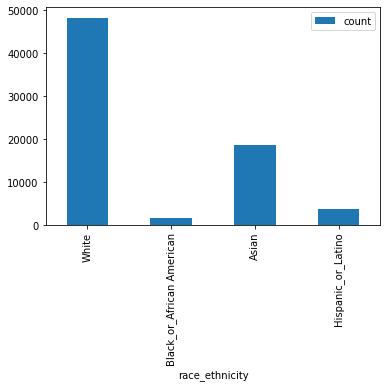

In [53]:
cond=(df['job_category']=='Managers') & (df['gender']=='Male') & (df['race_ethnicity'] != 'All')

df[cond].plot(kind='bar',x='race_ethnicity', y='count')
# df[cond]

In [77]:
df = pd.read_csv('data/silicon_valley_details.csv')
pd.set_option('max_rows',10)
df

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4435,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4436,Sanmina,2016,Overall_totals,NaN,Service workers,57
4437,Sanmina,2016,Overall_totals,NaN,Totals,5205
4438,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


In [80]:
df['company'].unique()

array(['23andMe', 'Adobe', 'Airbnb', 'Apple', 'Cisco', 'eBay', 'Facebook',
       'Google', 'HP Inc.', 'HPE', 'Intel', 'Intuit', 'LinkedIn', 'Lyft',
       'MobileIron', 'Nvidia', 'Pinterest', 'Salesforce', 'Square',
       'Twitter', 'Uber', 'View', 'PayPal', 'NetApp', 'Sanmina'],
      dtype=object)

In [115]:
cond=(df['company']=='Adobe') & (df['count'] != 0) & (df['race']=='Overall_totals') & (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')
a=df[cond]
a

,company,year,race,gender,job_category,count
333,Adobe,2016,Overall_totals,NaN,Executives,93
334,Adobe,2016,Overall_totals,NaN,Managers,2448
335,Adobe,2016,Overall_totals,NaN,Professionals,3028
337,Adobe,2016,Overall_totals,NaN,Sales workers,1270
338,Adobe,2016,Overall_totals,NaN,Administrative support,323


<AxesSubplot:ylabel='count'>

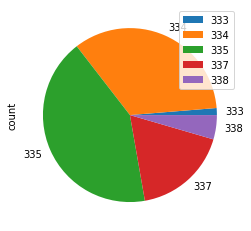

In [118]:
a.plot(kind='pie', y= 'count') 

In [119]:
a.set_index('job_category',inplace=True)
a

,company,year,race,gender,count
job_category,,,,,
Executives,Adobe,2016,Overall_totals,NaN,93
Managers,Adobe,2016,Overall_totals,NaN,2448
Professionals,Adobe,2016,Overall_totals,NaN,3028
Sales workers,Adobe,2016,Overall_totals,NaN,1270
Administrative support,Adobe,2016,Overall_totals,NaN,323


<AxesSubplot:ylabel='count'>

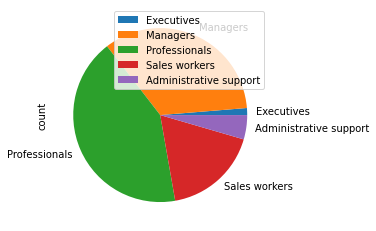

In [120]:
a.plot(kind='pie',y='count')

In [121]:
df = pd.read_csv('data/starbucks_drinks.csv')
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
215,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
216,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
217,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


<AxesSubplot:ylabel='Frequency'>

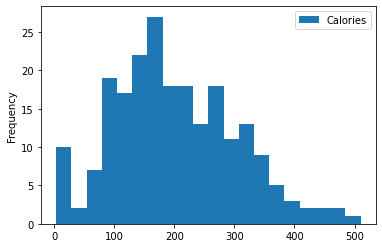

In [123]:
df.plot(kind='hist',y='Calories',bins=20) # 괄호를 채워 주세요.

<AxesSubplot:>

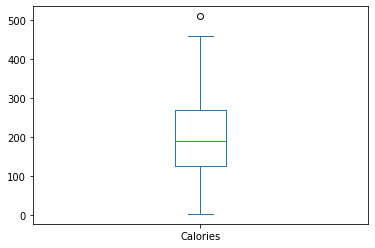

In [124]:
df.plot(kind='box',y='Calories')

In [141]:
df = pd.read_csv('data/world_indexes.csv',index_col=0)
df

,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Norway,0.943877,26.83,7.834,100.000000,0.778925,9.192879,11.914567,5.22,104.194175,86.956222,1.510000,11.300000,100.0,17.49259,67.03594,5.2,0.512555,27.973433,57.271805,0.750000,0.067443,1.815164,21.852720,317.497587,62448.017620,22.644475,64992.340460,0.000000,2.2,2.3,4963.0,-3.374490,96.30,26.800000,81.6,13.0,4.0,12.631000,116.51,9.019499,6.0,37.39,12.347838,0.186818,97.05961,98.850570,99.43699,1.511550,72.0,11.467400,6.55284,9.573011,9.590637,0.013,0.154407,47.752676,1.654740,111.061300,39.644970,13.772622,31.798391,74.10112,27.288097,0.14,2.8
Australia,0.934958,34.01,12.059,100.000000,1.090351,16.519210,-4.561812,30.27,107.789440,158.840776,1.360000,6.300000,100.0,20.22107,40.99572,5.2,3.330412,19.193731,95.367798,3.930000,0.110130,-0.017410,17.746741,990.721004,42831.061630,28.327407,42260.612950,33.406620,1.1,3.4,6382.0,17.132090,84.56,39.900000,82.4,16.1,6.0,12.963381,131.23,3.819851,6.5,32.73,1337.393551,8.984550,94.44895,107.777370,104.83840,6.118623,130.0,-6.789013,5.11041,8.998704,12.303007,0.025,0.157953,4.632202,2.385620,135.535430,30.530974,27.711793,65.333748,86.33409,21.361426,0.19,4.0
Switzerland,0.929613,32.

<AxesSubplot:xlabel='Life expectancy at birth- years', ylabel='Internet users percentage of population 2014'>

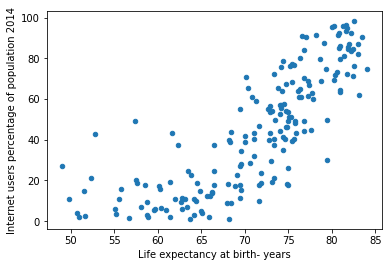

In [142]:
df.plot(kind='scatter',x='Life expectancy at birth- years',y='Internet users percentage of population 2014')

<AxesSubplot:xlabel='Forest area percentage of total land area 2012', ylabel='Carbon dioxide emissionsAverage annual growth'>

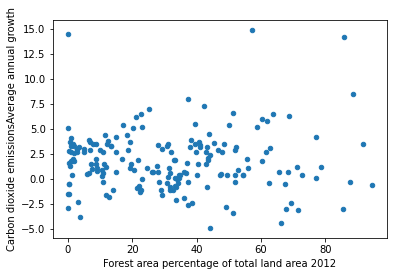

In [143]:
df.plot(kind='scatter',x='Forest area percentage of total land area 2012',y='Carbon dioxide emissionsAverage annual growth')

<AxesSubplot:xlabel='Internet users percentage of population 2014', ylabel='Forest area percentage of total land area 2012'>

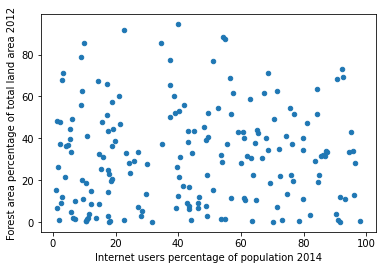

In [144]:
df.plot(kind='scatter',x='Internet users percentage of population 2014',y='Forest area percentage of total land area 2012')

<AxesSubplot:xlabel='Life expectancy at birth- years', ylabel='Carbon dioxide emissionsAverage annual growth'>

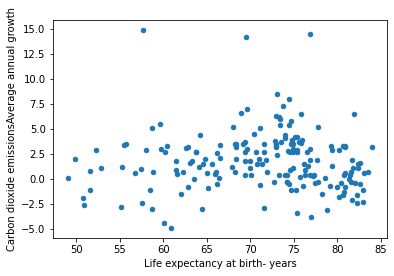

In [145]:
df.plot(kind='scatter',x='Life expectancy at birth- years',y='Carbon dioxide emissionsAverage annual growth')

<AxesSubplot:xlabel='Life expectancy at birth- years', ylabel='Forest area percentage of total land area 2012'>

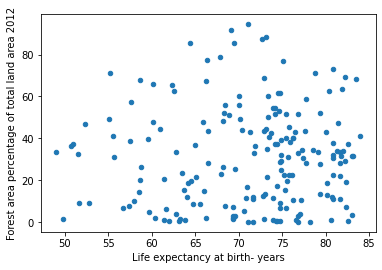

In [146]:
df.plot(kind='scatter',x='Life expectancy at birth- years',y='Forest area percentage of total land area 2012')

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/subway.csv')
df

,line,station,in,out
0,중앙선,지평,37,28
1,중앙선,용문,2064,2103
2,중앙선,원덕,375,357
3,중앙선,양평,4338,4378
4,중앙선,오빈,321,321
...,...,...,...,...
586,1호선,종로5가,31245,30678
587,1호선,종로3가,38099,36928
588,1호선,종각,52310,50088
589,1호선,시청,29150,29043


<AxesSubplot:>

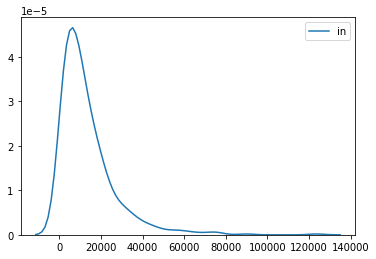

In [3]:
sns.kdeplot(df['in']) 

In [4]:
df = pd.read_csv('data/salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


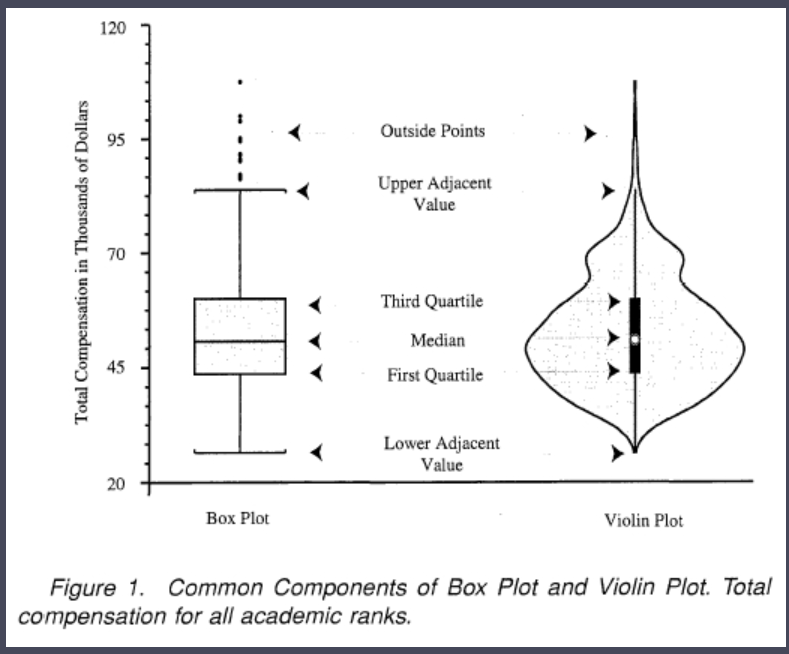

<AxesSubplot:xlabel='salary'>

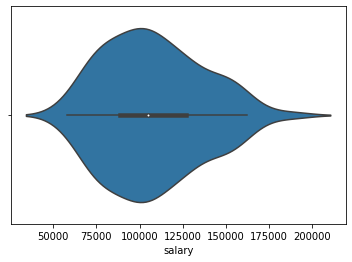

In [5]:
sns.violinplot(x=df['salary'])

In [6]:
df = pd.read_csv('data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


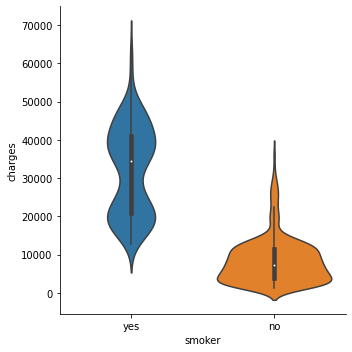

In [7]:
sns.catplot(data=df, x='smoker', y='charges', kind='violin')

In [17]:
df=pd.read_csv('data/occupations.csv',index_col=0)
condF=(df['gender']=='F')
dfF=df[condF]
dfF
dfF['occupation'].value_counts()

student          60
other            36
administrator    36
librarian        29
educator         26
writer           19
artist           13
healthcare       11
marketing        10
homemaker         6
programmer        6
none              4
executive         3
scientist         3
salesman          3
engineer          2
lawyer            2
entertainment     2
retired           1
technician        1
Name: occupation, dtype: int64

In [19]:
men=df[df['gender']=='M']
men
men['occupation'].value_counts()

student          136
other             69
educator          69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
librarian         22
entertainment     16
marketing         16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
none               5
healthcare         5
homemaker          1
Name: occupation, dtype: int64

In [20]:
df = pd.read_csv('data/young_survey.csv')
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [21]:
df=pd.read_csv('data/survey.csv')
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


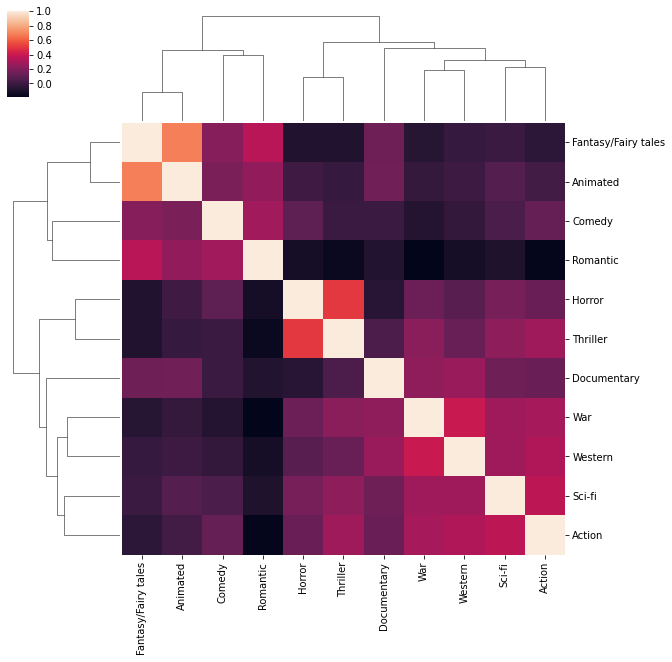

In [26]:
movieCat=df.loc[:,'Horror':'Action']
sns.clustermap(movieCat.corr())

In [51]:
titanicDf = pd.read_csv('data/titanic.csv')
titanicDf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
titanicDf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

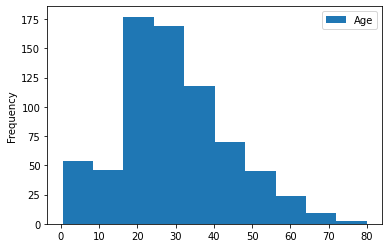

In [35]:
titanicDf.plot(kind='hist',y='Age')

In [39]:
titanicDf.sort_values(by='Fare',ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S


In [41]:
titanicDf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [54]:
titanicDf['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

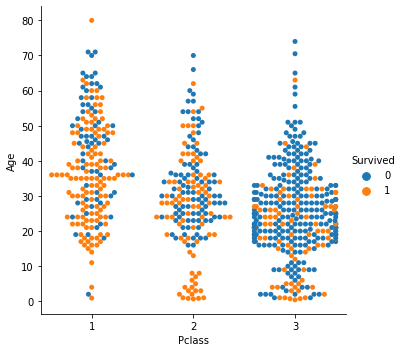

In [59]:
sns.catplot(data=titanicDf, x='Pclass', y='Age', kind='swarm',hue='Survived')

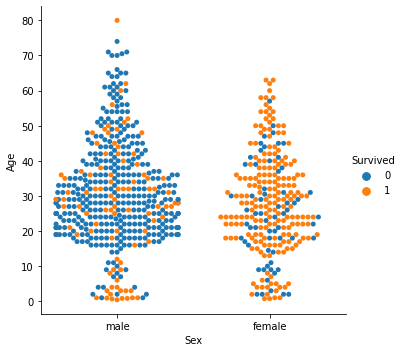

In [60]:
sns.catplot(data=titanicDf, x='Sex', y='Age', kind='swarm',hue='Survived')

In [61]:
df = pd.read_csv('data/museum_1.csv')
df

,시설명,어른관람료,운영기관전화번호
0,필암서원 유물전시관,500,061-390-7224
1,원주역사박물관,0,033-737-4371
2,뮤지엄산미술관,15000,033-730-9000
3,오랜미래신화미술관,0,033-746-5256
4,연세대학교 원주박물관,0,033-760-2731
...,...,...,...
895,함양박물관,0,055-960-5532
896,박물관수,5000,053-744-5500
897,대구은행금융박물관,0,053-740-2061
898,국립대구박물관,0,053-768-6051


In [62]:
df['분류']='일반'
df

,시설명,어른관람료,운영기관전화번호,분류
0,필암서원 유물전시관,500,061-390-7224,일반
1,원주역사박물관,0,033-737-4371,일반
2,뮤지엄산미술관,15000,033-730-9000,일반
3,오랜미래신화미술관,0,033-746-5256,일반
4,연세대학교 원주박물관,0,033-760-2731,일반
...,...,...,...,...
895,함양박물관,0,055-960-5532,일반
896,박물관수,5000,053-744-5500,일반
897,대구은행금융박물관,0,053-740-2061,일반
898,국립대구박물관,0,053-768-6051,일반


In [70]:
cond=df['시설명'].str.contains('대학')
df.loc[cond,'분류'] = '대학'
df['분류'].value_counts()
# is_university = df['시설명'].str.contains('대학교')
# is_university
# df.loc[is_university == True, '분류'] = '대학'
# df.loc[is_university == False, '분류'] = '일반'


일반    814
대학     86
Name: 분류, dtype: int64

In [71]:
df = pd.read_csv('data/museum_2.csv')
df

,시설명,어른관람료,운영기관전화번호,분류
0,필암서원 유물전시관,500,061-390-7224,일반
1,원주역사박물관,0,033-737-4371,일반
2,뮤지엄산미술관,15000,033-730-9000,일반
3,오랜미래신화미술관,0,033-746-5256,일반
4,연세대학교 원주박물관,0,033-760-2731,대학
...,...,...,...,...
895,함양박물관,0,055-960-5532,일반
896,박물관수,5000,053-744-5500,일반
897,대구은행금융박물관,0,053-740-2061,일반
898,국립대구박물관,0,053-768-6051,일반


* df.insert(loc=idx, column='지역번호', value=phone_number[0])를 사용하시면 됩니다 (idx= 원하시는 인덱스).
* df = df[['어른관람료', '시설명', '운영기관전화번호', '분류']] 컬럼은 이렇게 바꿔주시면 됩니다 (컬럼명은 df.columns로 확인하실 수 있습니다).

In [80]:
num=df['운영기관전화번호'].str.split(pat='-',n=1,expand=True)
df['지역번호']=num[0]
df

,시설명,어른관람료,운영기관전화번호,분류,지역번호
0,필암서원 유물전시관,500,061-390-7224,일반,061
1,원주역사박물관,0,033-737-4371,일반,033
2,뮤지엄산미술관,15000,033-730-9000,일반,033
3,오랜미래신화미술관,0,033-746-5256,일반,033
4,연세대학교 원주박물관,0,033-760-2731,대학,033
...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,055
896,박물관수,5000,053-744-5500,일반,053
897,대구은행금융박물관,0,053-740-2061,일반,053
898,국립대구박물관,0,053-768-6051,일반,053


In [4]:
df = pd.read_csv("data/museum_3.csv", dtype={'지역번호': str})
df

,시설명,어른관람료,운영기관전화번호,분류,지역번호
0,필암서원 유물전시관,500,061-390-7224,일반,061
1,원주역사박물관,0,033-737-4371,일반,033
2,뮤지엄산미술관,15000,033-730-9000,일반,033
3,오랜미래신화미술관,0,033-746-5256,일반,033
4,연세대학교 원주박물관,0,033-760-2731,대학,033
...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,055
896,박물관수,5000,053-744-5500,일반,053
897,대구은행금융박물관,0,053-740-2061,일반,053
898,국립대구박물관,0,053-768-6051,일반,053


In [9]:
region = {
    '02':'서울시',
    '031':'경기도',
    '032':'경기도',
    '033':'강원도',
    '041':'충청도',
    '042':'충청도',
    '043':'충청도',
    '044':'충청도',
    '051':'부산시',
    '052':'경상도',
    '053':'경상도',
    '054':'경상도',
    '055':'경상도',
    '061':'전라도',
    '062':'전라도',
    '063':'전라도',
    '064':'제주도',
    '1577':'기타',
    '070':'기타'
}
df['지역명']=df['지역번호'].map(region)
df.drop('지역번호',axis='columns',inplace=True)
df

,시설명,어른관람료,운영기관전화번호,분류,지역명
0,필암서원 유물전시관,500,061-390-7224,일반,전라도
1,원주역사박물관,0,033-737-4371,일반,강원도
2,뮤지엄산미술관,15000,033-730-9000,일반,강원도
3,오랜미래신화미술관,0,033-746-5256,일반,강원도
4,연세대학교 원주박물관,0,033-760-2731,대학,강원도
...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,경상도
896,박물관수,5000,053-744-5500,일반,경상도
897,대구은행금융박물관,0,053-740-2061,일반,경상도
898,국립대구박물관,0,053-768-6051,일반,경상도


In [36]:
df = pd.read_csv('data/occupations2.csv')
df
# df['gender'][df['gender']=='F']
# df['gender'][df['gender']=='M']=0
# # df['gender']=df['gender'].astype(int)
# df

,age,gender,occupation
0,24,M,technician
1,53,F,other
2,23,M,writer
3,24,M,technician
4,33,F,other
...,...,...,...
938,26,F,student
939,32,M,administrator
940,20,M,student
941,48,F,librarian


In [45]:
df.loc[df['gender']=='M','gender'] = 0
df.loc[df['gender']=='F','gender'] = 1
df['gender']=df['gender'].astype(int)
df.dtypes

age            int64
gender         int32
occupation    object
dtype: object

In [49]:
job2=df.groupby('occupation')
job2.mean()['gender'].sort_values(ascending=False)
# 남자는 0, 여자는 1이기 때문에, 평균이 0에 가까울 수록 남자가 많음
# homemaker는 여성이 86%

occupation
homemaker        0.857143
healthcare       0.687500
librarian        0.568627
artist           0.464286
administrator    0.455696
none             0.444444
writer           0.422222
marketing        0.384615
other            0.342857
student          0.306122
educator         0.273684
salesman         0.250000
lawyer           0.166667
entertainment    0.111111
scientist        0.096774
executive        0.093750
programmer       0.090909
retired          0.071429
technician       0.037037
engineer         0.029851
doctor           0.000000
Name: gender, dtype: float64

In [22]:
job=df.groupby('occupation')
job.mean().sort_values(by='age',ascending=True)

,age
occupation,
student,22.081633
none,26.555556
entertainment,29.222222
artist,31.392857
homemaker,32.571429
programmer,33.121212
technician,33.148148
other,34.523810
scientist,35.548387


In [35]:
job.mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [53]:
museum = pd.read_csv("data/museum_3.csv", dtype={'지역번호': str})
number = pd.read_csv("data/region_number.csv", dtype={'지역번호': str})

In [54]:
museum

,시설명,어른관람료,운영기관전화번호,분류,지역번호
0,필암서원 유물전시관,500,061-390-7224,일반,061
1,원주역사박물관,0,033-737-4371,일반,033
2,뮤지엄산미술관,15000,033-730-9000,일반,033
3,오랜미래신화미술관,0,033-746-5256,일반,033
4,연세대학교 원주박물관,0,033-760-2731,대학,033
...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,055
896,박물관수,5000,053-744-5500,일반,053
897,대구은행금융박물관,0,053-740-2061,일반,053
898,국립대구박물관,0,053-768-6051,일반,053


In [55]:
number

,지역번호,지역명
0,02,서울특별시
1,031,경기도
2,032,인천광역시
3,033,강원도
4,041,충청남도
5,042,대전광역시
6,043,충청북도
7,044,세종특별자치시
8,051,부산광역시
9,052,울산광역시


In [66]:
pd.merge(museum,number,on='지역번호',how='left')

,시설명,어른관람료,운영기관전화번호,분류,지역번호,지역명
0,필암서원 유물전시관,500,061-390-7224,일반,061,전라남도
1,원주역사박물관,0,033-737-4371,일반,033,강원도
2,뮤지엄산미술관,15000,033-730-9000,일반,033,강원도
3,오랜미래신화미술관,0,033-746-5256,일반,033,강원도
4,연세대학교 원주박물관,0,033-760-2731,대학,033,강원도
...,...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,055,경상남도
896,박물관수,5000,053-744-5500,일반,053,대구광역시
897,대구은행금융박물관,0,053-740-2061,일반,053,대구광역시
898,국립대구박물관,0,053-768-6051,일반,053,대구광역시
